In [2]:
import numpy as np
import pandas as pd

from copulas.multivariate.gaussian import GaussianMultivariate
from examples import utils

## Get datasets from S3 Bucket

In [3]:
BUCKET = 'copulas-data-store'

In [4]:
datasets = utils.get_datasets(BUCKET, limit=10)

## Try to sample them and get an overview of the performance

In [5]:
results = []

for dataset, data in datasets.items():
    copula = GaussianMultivariate()
    copula.fit(data)
    sampled = copula.sample(len(data))
    
    data_means = data.mean(axis=0)
    data_stds = data.std(axis=0)
    sampled_means = sampled.mean(axis=0)
    sampled_stds = sampled.std(axis=0)
    
    results.append({
        'dataset': dataset,
        'data_means': data.mean(axis=0).mean(),
        'data_stds': data.std(axis=0).mean(),
        'sample_means': sampled.mean(axis=0).mean(),
        'sample_stds': sampled.std(axis=0).mean(),
    })
    
results = pd.DataFrame(results)[['dataset', 'data_means', 'sample_means', 'data_stds', 'sample_stds']]

In [6]:
results

,dataset,data_means,sample_means,data_stds,sample_stds
0,Australian_1_test.csv,-0.594275,-0.598096,0.288534,0.287961
1,Australian_1_train.csv,-0.600419,-0.602164,0.310040,0.298619
2,CostaMadre1_1_test.csv,4506.242945,2114.223588,17770.300999,6055.010622
3,CostaMadre1_1_train.csv,2578.485939,3503.869146,5190.251691,4754.543243
4,ar5_1_test.csv,3069.279155,4552.556963,6007.283830,3196.790857
5,ar5_1_train.csv,3766.843618,1706.139500,7031.648178,5866.953647
6,boston_1_test.csv,49.598899,49.469396,16.459845,15.194686
7,boston_1_train.csv,49.186788,49.170520,17.261923,17.455992
8,chscase_census4_1_test.csv,18.567858,18.217785,5.295511,5.415083
9,chscase_census4_1_train.csv,17.941049,17.864123,4.379584,4.354692


## See the details on an individual column

In [7]:
from copulas.univariate import GaussianUnivariate

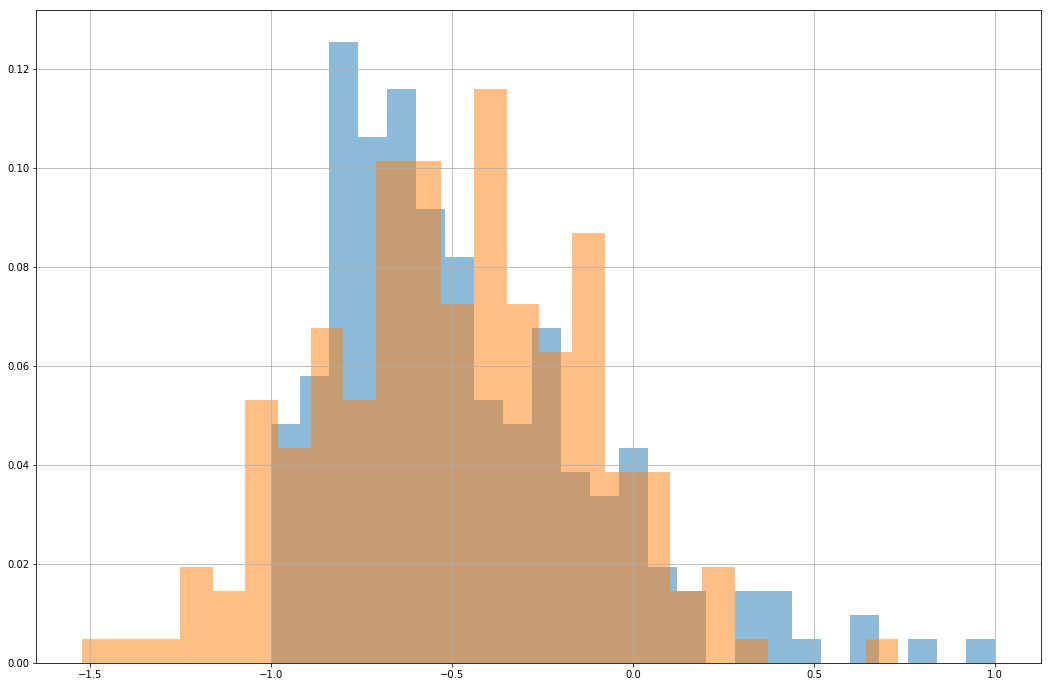

In [17]:
data = list(datasets.values())[0][0]

copula = GaussianUnivariate()
copula.fit(data)

sampled = pd.Series(copula.sample(len(data)))

data.hist(
    bins=25,
    figsize=(18,12),
    weights=np.zeros_like(data) + 1. / data.size,
    alpha=0.5
)
sampled.hist(
    bins=25,
    figsize=(18,12),
    weights=np.zeros_like(sampled) + 1. / sampled.size,
    alpha=0.5
)